In [1]:
import Motoresdecombustioninterna as th

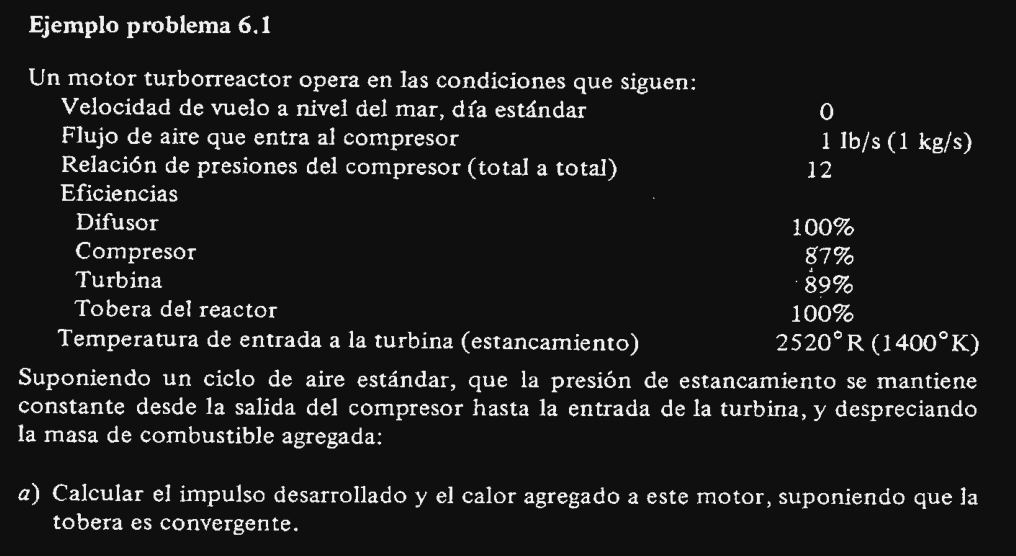
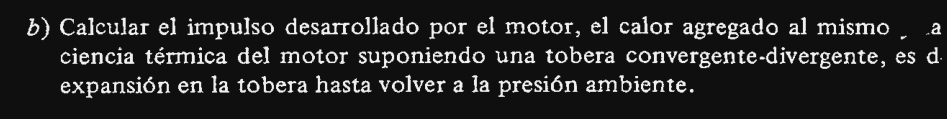

In [2]:
V1 = 0 #Velocidad de vuelo
MF = 1 #lb/s
RC = 12 # Relación de compresor
#Eficiencias
ND = 1 # Eficiencia de difusor
NC = 0.87 # Eficiencia de compresor
NTUR = 0.89 # Eficiencia de turbina
NTOB = 1 # Eficiencia tobera
T3 = 2520 # °R Temperatura de entrada a la turbina (estancamiento)
h = 0 # Altura a nivel del mar en ft
U = 1 # SISTEMA INGLES
R = 1.98718 # BTU/MOL*R
GC = 32.2 #lbm*ft/lbf*s^2
FactorCONV = 778.16 #BTU a lbf*ft
f = 0

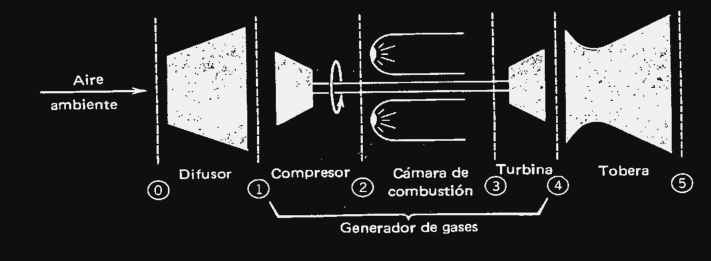

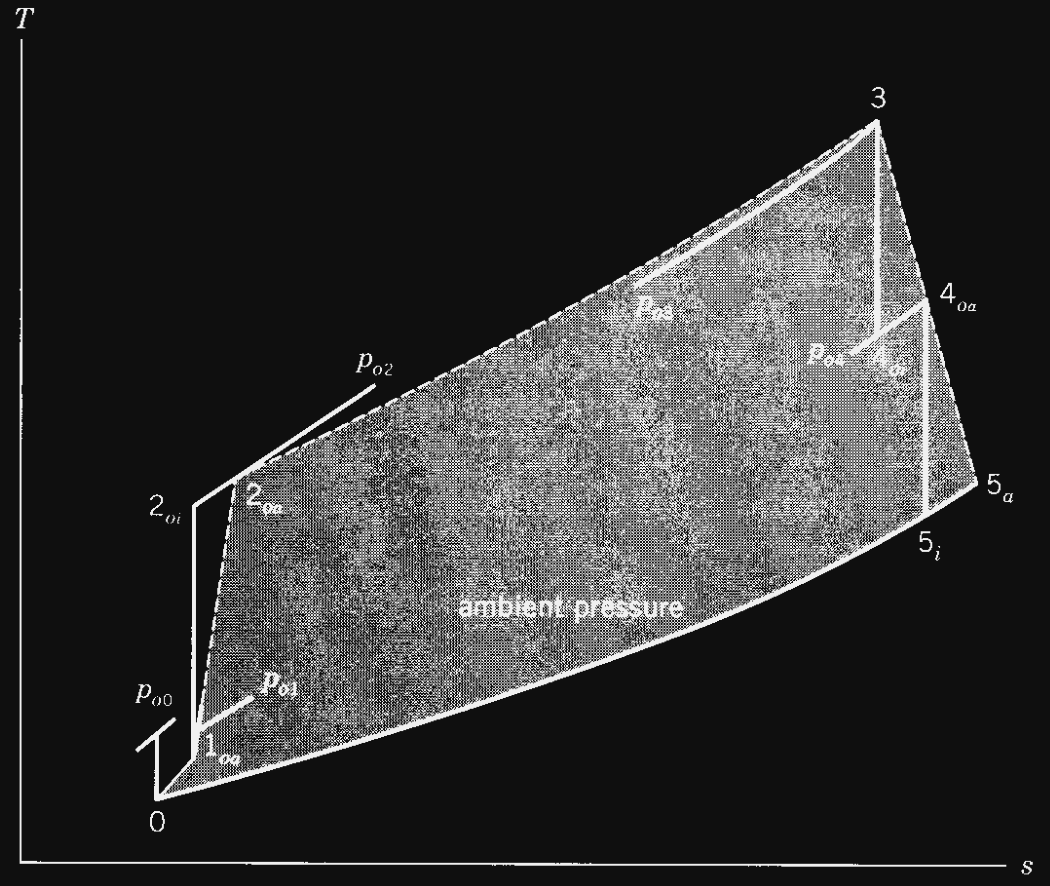

Suponiendo ciclo de aire estándar, la presión de estancamiento se mantiene cte desde la salida del compresor hasta la entrada de la turbina, despreciando la masa de combustible agregada

# Valores del punto 1 (Ent. Compresor)

Encontrar valores de temperatura y presión a altura h

In [3]:
tt1,pt1 = th.ISApropiedades(u=U,a=h)

In [4]:
print(tt1,"|",  pt1)

518.67 | 14.696


In [5]:
th.TemperaturaING(tt1)

,Cp(Btu/mol*R),h(Btu/mol),s(Btu/mol*R),Pr
Temperatura(R),,,,
510.00,6.953000,-236.3000,46.013000,1.13750
518.67,6.953867,-175.9568,46.130045,1.20686
520.00,6.954000,-166.7000,46.148000,1.21750


In [6]:
#VALORES A MODIFICAR
ht1 = -175.9568
pr1 = 1.20686

# Sacar valores punto 2 ideal (Ent. Cámara de combustión)

In [7]:
pr2i = th.presionRelativa(pr1,rp = RC)
pr2i

In [8]:
th.PresionRelING(pr2i)

,Temperatura(R),Cp(Btu/mol*R),h(Btu/mol),s(Btu/mol*R)
Pr,,,,
14.23000,1040.000000,7.241000,3507.000000,51.033000
14.48232,1044.928125,7.245189,3542.728906,51.067004
15.25400,1060.000000,7.258000,3652.000000,51.171000


In [9]:
#VALORES A MODIFICAR
tt2i = 1044.928125
ht2i = 3542.728906
st2i = 51.067004

# Sacar valores reales 2 (Ent. Cámara de combustión)

In [10]:
ht2r = th.eficienciaCompresor(eficCompresor=NC,h1=ht1, h2i = ht2i)
ht2r #BTU/lbmolaire

In [11]:
th.EntalpiaING(ht2r)

,Temperatura(R),Cp(Btu/mol*R),s(Btu/mol*R),Pr
h(Btu/mol),,,,
4089.100000,1120.000000,7.311000,51.572000,18.666000
4098.394586,1121.269752,7.312143,51.580253,18.745804
4235.500000,1140.000000,7.329000,51.702000,19.923000


In [12]:
#VALORES A MODIFICAR
tt2r = 1121.269752
pr2r = 18.745804

#VALORES NO MODIFICABLES
pt2 = RC*pt1
pt2

# Valores del punto 3 (Ent. Turbina de gas)

In [13]:
th.TemperaturaING(T3)

,Cp(Btu/mol*R),h(Btu/mol),s(Btu/mol*R),Pr
Temperatura(R),,,,
2500.0,8.289,14942.6,57.834,436.1
2520.0,8.298,15108.5,57.901,450.9
2540.0,8.307,15274.5,57.966,466.0


In [14]:
#VALORES A MODIFICAR
ht3 = 15108.5
pr3 = 450.9

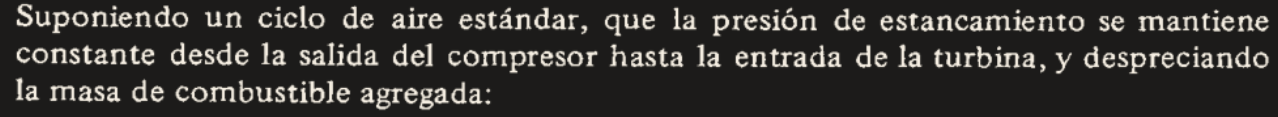

In [15]:
pt3 = pt2
pt3

In [16]:
wtgr = ht2r-ht1 # Trabajo de turbina de gas
wtgr #Btu/lbmolaire

In [17]:
ht4r=ht3-wtgr # Entalpia 4 real
ht4r # Btu/lbmolaire

# Valores del punto 4 real (Ent. Tobera)

In [18]:
th.EntalpiaING(ht4r)

,Temperatura(R),Cp(Btu/mol*R),s(Btu/mol*R),Pr
h(Btu/mol),,,,
10700.900000,1980.00000,8.013000,55.933000,167.550000
10834.148614,1996.61454,8.022969,56.000289,173.315246
10861.300000,2000.00000,8.025000,56.014000,174.490000


In [19]:
#VALORES A MODIFICAR
tt4r = 1996.61454
pr4r = 173.315246

In [20]:
th.formulasFriccionPresiones() #Ayuda visual

# Valores del punto 4 ideal (Ent. Tobera)

In [21]:
ht4i = th.eficienciaTurbinaGas(eficTurbinaGas=NTUR, h3=ht3, h4r= ht4r)
ht4i

In [22]:
th.EntalpiaING(ht4i)

,Temperatura(R),Cp(Btu/mol*R),s(Btu/mol*R),Pr
h(Btu/mol),,,,
10221.200000,1920.000000,7.976000,55.687000,148.04000
10305.857993,1930.602128,7.982361,55.730999,151.37967
10380.900000,1940.000000,7.988000,55.770000,154.34000


In [23]:
#VALORES A MODIFICAR
tt4i = 1930.602128
pr4i = 151.37967

In [24]:
pt4 = pt3*(pr4i/pr3)
pt4

# Calor de entrada

In [25]:
qent = ht3-ht2r
qent

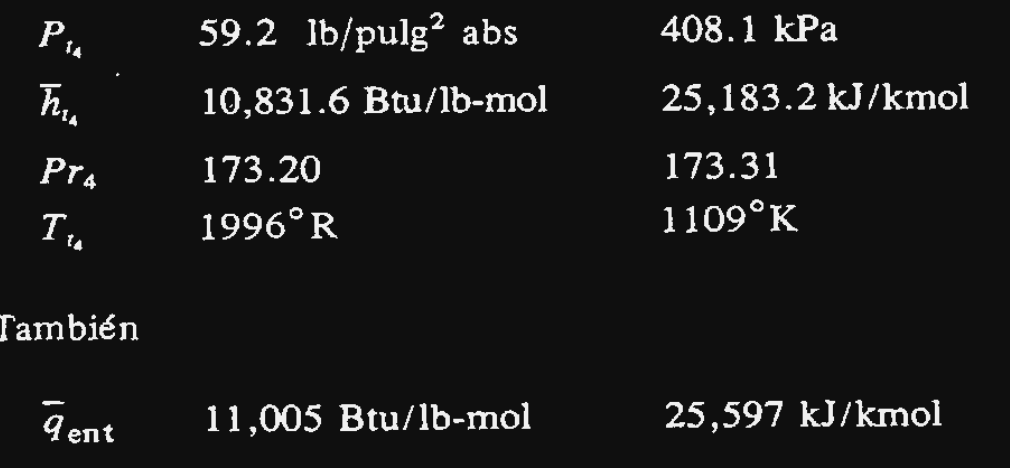

In [26]:
print("pt4",pt4,"\nht4",ht4r,"\npr4",pr4r,"\ntt4",tt4r,"\nqent",qent)

pt4 59.20627093333334 
ht4 10834.148613793102 
pr4 173.315246 
tt4 1996.61454 
qent 11010.105413793102


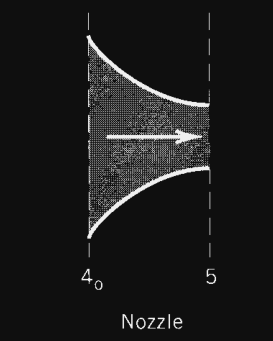

La velocidad en la salida sería sónica, se necesita aproximar la temperatura de salida y su velocidad

In [27]:
# v5 = c5

In [28]:
th.valorK(U,1709)

In [29]:
vel5 = lambda T: ((ht4r-th.moleculaEntalpia("aire seco",T,U))*2*GC*778/th.aireSecoMol)**(1/2)

In [30]:
vel5(1709)

In [31]:
c5 = lambda T: (1.34*GC*R*T*778/th.aireSecoMol)**(1/2)

In [32]:
c5(1709)

In [35]:
# g = lambda T: (th.valorK(U,T)*R*T*778.16*GC/th.aireSecoMol)-((ht4r-th.moleculaEntalpia("aire seco",T,U))*2*GC*778.16/th.aireSecoMol)

In [34]:
func = lambda T5: th.valorK(U,T5)*R*T5 - 2*(ht4r-th.moleculaEntalpia("Aire seco",T5,U))

In [35]:
t5=th.raizFuncion(func,0.00000001,u=U)
t5

-4.090907168574631e-09
N° de iteraciones: 41


In [36]:
h5 = th.moleculaEntalpia("aire seco",t5,U)
h5

In [37]:
v5 = ((ht4r-h5)*(2*GC*FactorCONV)/th.aireSecoMol)**(1/2)
v5

In [38]:
th.TemperaturaING(t5)

,Cp(Btu/mol*R),h(Btu/mol),s(Btu/mol*R),Pr
Temperatura(R),,,,
1709.701576,7.832276,8558.563341,54.770142,93.34069
1709.701576,7.832276,8558.563341,54.770142,93.34069
1709.701576,7.832276,8558.563341,54.770142,93.34069


In [39]:
# VALORES A MODIFICAR
pr5 = 93.34069

In [40]:
p5=pt4*(pr5/pr4r)
p5

In [41]:
a5 = MF*R*FactorCONV*t5/(p5*v5*th.aireSecoMol*144)
a5

In [42]:
impu = (p5-pt1)*a5*144+MF*((1+f)*v5-V1)/(GC)
impu #LBF

# Tobera convergente-divergente 

In [43]:
p5=pt1

In [44]:
pr5i = pr4r*(p5/pt4)
pr5i

In [45]:
th.PresionRelING(pr5i)

,Temperatura(R),Cp(Btu/mol*R),h(Btu/mol),s(Btu/mol*R)
Pr,,,,
43.017000,1400.000000,7.569000,6172.200000,53.231000
43.019782,1400.023269,7.569022,6172.376377,53.231126
45.408000,1420.000000,7.588000,6323.800000,53.339000


In [46]:
# VALORES A MODIFICAR
t5i = 1400.023269
h5i = 6172.376377

In [47]:
v5i = ((ht4r-h5i)*(2*GC*778.16)/th.aireSecoMol)**(1/2)
v5i

In [48]:
impu = (p5-pt1)+MF*((1+f)*v5i-V1)/(GC)
impu

# Eficiencia termica

In [49]:
nt =v5i**2/(2*GC*FactorCONV*qent/th.aireSecoMol)
nt